**Task 1:** Find a data set which is suitable for a regression task (you can use one of the data sets which you used in Homework I and there is no limit on the number of features or type of the features). Then, apply [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and  [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to this data set to find the best performing model with respect to **mean squared error** metric. Report the feature importance of best performing algorithm and comment on it.


#### Instructions to follow:

- Include all your codes here. Be sure that your code is CLEAN, READABLE, and REPRODUCIBLE.
- Put your data set into a **datasets** folder.
- Put your images (if available) into an **images** folder.
- Please return a NICE and CLEAR homework. Otherwise, it will not be graded.
- Please write YOUR OWN code. **DO NOT copy** my codes or someone else's codes.

## Data Decription

- Import and introduce your data set here.

This 'ConcreteStrengthData' data set (can be found [here](https://www.kaggle.com/datasets/mchilamwar/predict-concrete-strength)). This data set contains 9 columns and 1030 rows. 

The description of the column names are as follows:
- Cement: Amount of cement in the concrete.
- BlastFurnace: Amount of Blast Furnace Slag in concrete.
- FlyAsh: Amount of FlyAsh in concrete.
- Water: Amount of water in concrete.
- Superplasticizer: Amount of Super plasticizer in concrete.
- CoarseAggregate: Amount of Coarse Aggregate in concrete.
- FineAggregate: Amount of Coarse Aggregate in concrete.
- Age: How many days the concrete was left dry?
- Strength: What was the final strength of concrete? (This is the target variable.)

In [4]:
import pandas as pd
concrete = pd.read_csv('datasets/ConcreteStrengthData.csv')
concrete.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
concrete.columns = ['Cement','BlastFurnace','FlyAsh','Water','Superplasticizer','CoarseAggregate','FineAggregate','Age','Strength']

In [6]:
concrete.head()

,Cement,BlastFurnace,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   BlastFurnace      1030 non-null   float64
 2   FlyAsh            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CoarseAggregate   1030 non-null   float64
 6   FineAggregate     1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   Strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [8]:
concrete.shape

(1030, 9)

## Decision Tree Regressor Implementation

- Implement your decision tree regressor here.
- This part may involve tuning of hyper parameters of decision tree regressor with respect to **mean squared error** metric.
- Visualize the best performing decision tree here.
- Comment on the feature importance here.

 *  ### Preparing the data
 
We first need to separate the features and the target variable. Then we need to split the data into training and test (unseen) data first without performing any algorithms on it as doing this first prevents data leakage.

We need cross validation as a method to help prevent overfitting. So, I am going to split the data as trainval (training + validation) and test. It's very crucial that we never use the test data until the evaluation part here.

In [9]:
#Separate data as feature matrix and the target vector.

X = concrete.drop(columns=["Strength"], axis=1)
y = concrete[['Strength']]

In [10]:
#Data splitting

from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2002)

- ### Tuning the hyper-parameters

If we allow the decision tree to grow to its full length, the model learns the training data so well and the model will *over-fit* the data. We need to perform `pre-pruning` to stop the growth of the desicion tree at some point. 
The pre-pruning technique involves **tuning the hyper parameters** of decision tree regressor before fitting the model to the training data. 


When tuning the hyper-parameters GridSearchCV takes too much time as we have to tune multiple hyper-parameters. **RandomizedSearchCV** takes limited time to do the same job. It tries a random subset of combinations to find the best combinations instead of trying all possible combinations. 

In [11]:
#Multiple hyper-parameter tuning with RandomizedSearchCV

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(criterion = 'squared_error', random_state = 22) #'squared_error' for the mean squared error.

param_grid = {'max_depth': list(range(1, 5)),       #we need the minimums to be high and the maximums to be low.
              'max_leaf_nodes': list(range(2, 5)),  #so I am choosing the ranges according to this.
              'min_samples_split': list(range(4, 7)),
               'min_samples_leaf': list(range(4, 7)),
              }

kcv = KFold(n_splits=5, shuffle=True, random_state = 2023) 

rand_search = RandomizedSearchCV(estimator = tree, 
                               param_distributions = param_grid, 
                               scoring='neg_mean_squared_error', 
                               cv = kcv,
                               random_state = 2000)

In [12]:
#Model fitting
rand_search.fit(X_trainval, y_trainval)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
                   estimator=DecisionTreeRegressor(random_state=22),
                   param_distributions={'max_depth': [1, 2, 3, 4],
                                        'max_leaf_nodes': [2, 3, 4],
                                        'min_samples_leaf': [4, 5, 6],
                                        'min_samples_split': [4, 5, 6]},
                   random_state=2000, scoring='neg_mean_squared_error')

In [13]:
rand_search.best_estimator_

DecisionTreeRegressor(max_depth=2, max_leaf_nodes=4, min_samples_leaf=6,
                      min_samples_split=4, random_state=22)

In [14]:
rand_search.scorer_

make_scorer(mean_squared_error, greater_is_better=False)

In [15]:
#Evaluating the performance of the best DecisionTreeRegressor on training data.
rand_search.score(X_trainval, y_trainval)

-142.61602910358718

In [16]:
#Evaluating the performance of the best DecisionTreeRegressor on test data.
rand_search.score(X_test, y_test)

-150.2381405014919

- ### Visualizing the decision tree

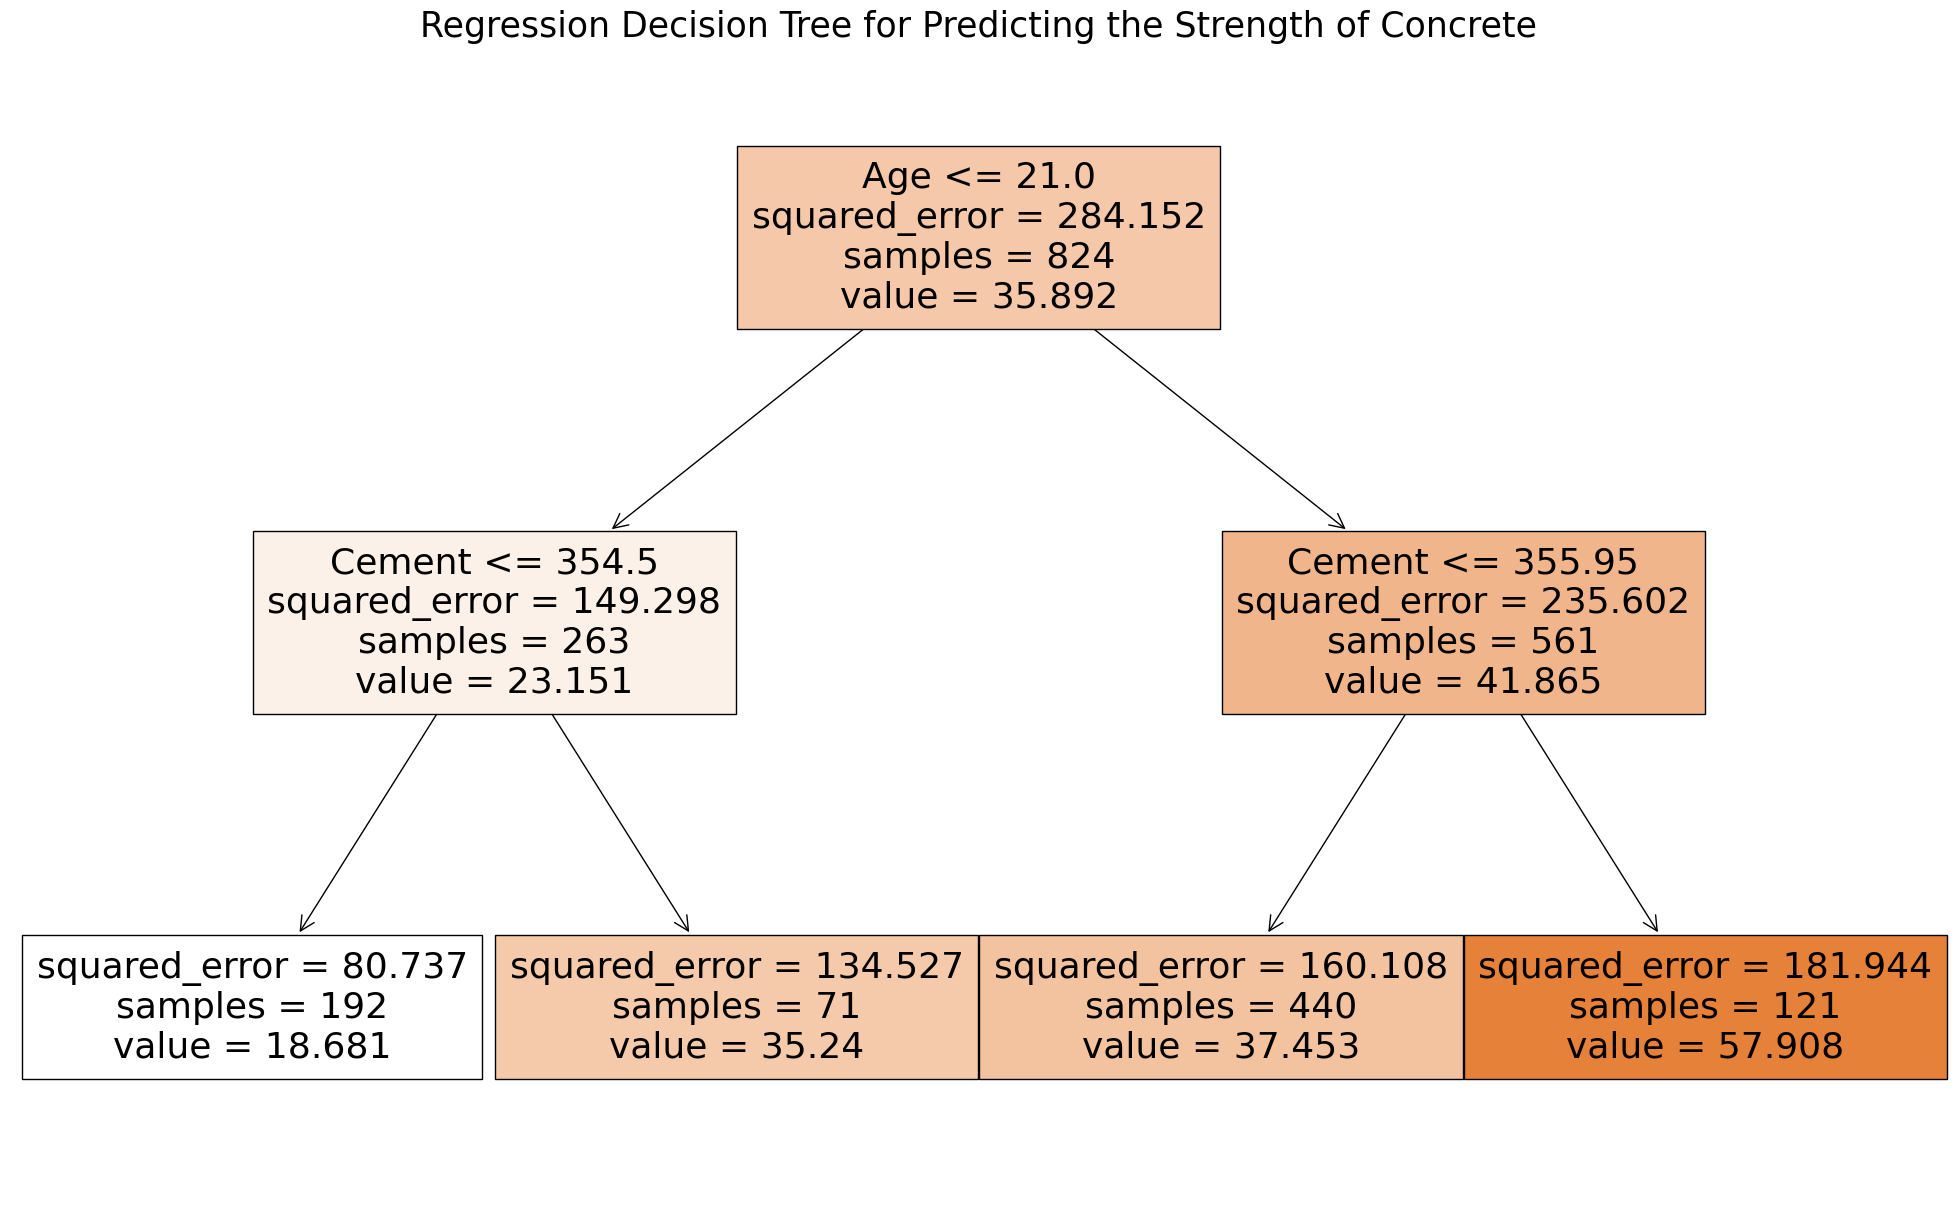

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]

from sklearn.tree import plot_tree

fig, ax = plt.subplots()

tree_plot = plot_tree(rand_search.best_estimator_, 
                      feature_names = X_trainval.columns,  
                       ax=ax, filled=True)

plt.title("Regression Decision Tree for Predicting the Strength of Concrete", fontsize = 25)
plt.show();

- ### Feature Importance

`Feature importance` is a score that has a value between 0 and 1. The closer the feature importance is to 1 the more important it is to our model.

In [18]:
rand_search.best_estimator_.feature_names_in_

array(['Cement', 'BlastFurnace', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age'], dtype=object)

In [20]:
rand_search.best_estimator_.feature_importances_

array([0.46235805, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.53764195])

In this model, the important features that contribute the most to the model are `Cement` and `Age`.

## Random Forest Tree Regressor Implementation

- Implement your random forest tree regressor here.
- This part may involve tuning of hyper parameters of random forest regressor.
- Visualize one of the trees in the best performing random forest regressor.
- Comment on the feature importance here.

In [21]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=50, criterion='squared_error', max_depth=3,  max_features='sqrt', random_state=1989)
forest.fit(X_trainval, y_trainval.values.ravel())

RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=50,
                      random_state=1989)

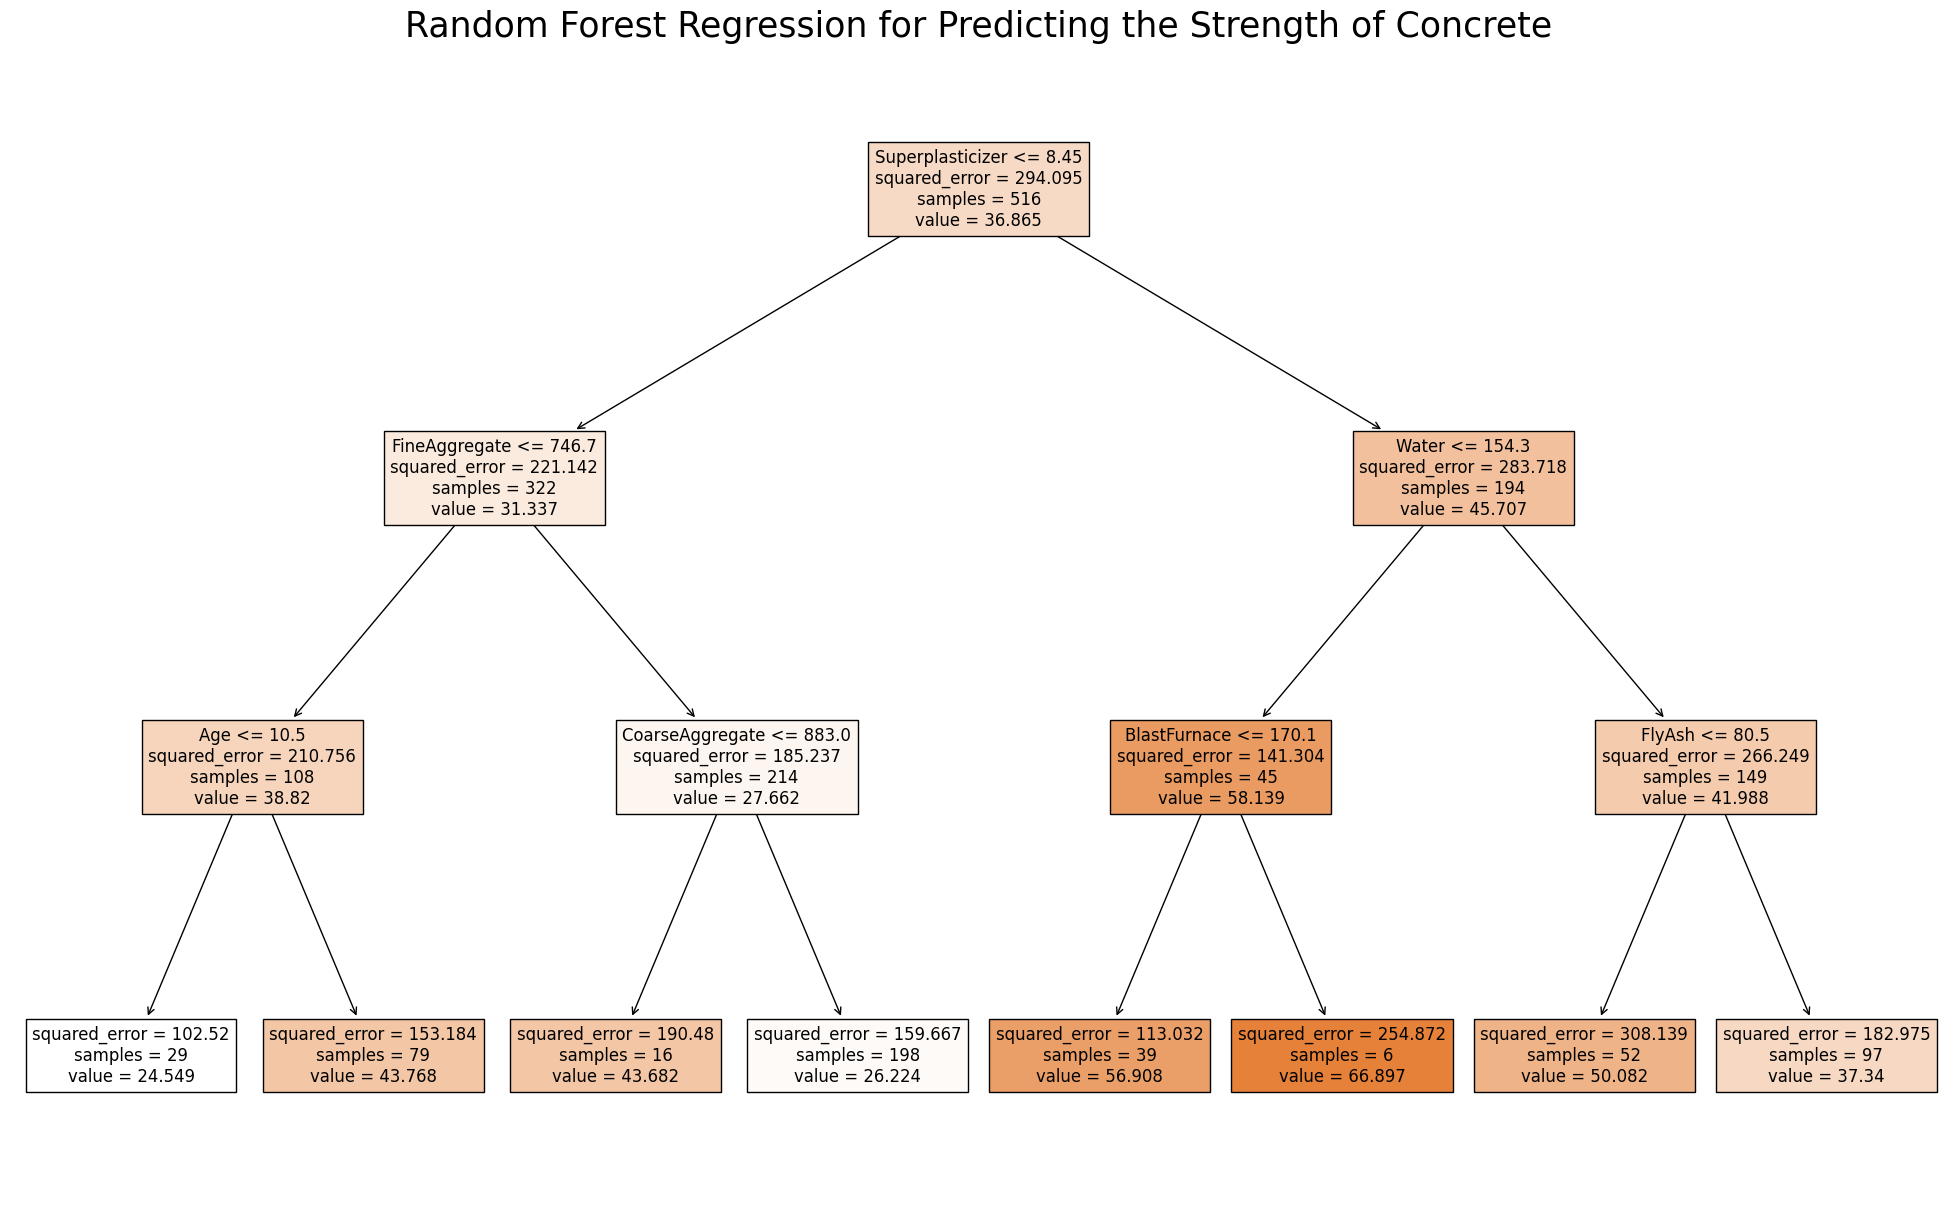

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]

from sklearn.tree import plot_tree

fig, ax = plt.subplots()

forest_plot = plot_tree(forest.estimators_[0], 
                      feature_names = X_trainval.columns,  
                       ax=ax, filled=True)

plt.title("Random Forest Regression for Predicting the Strength of Concrete", fontsize = 25)
plt.show();

In [23]:
forest.score(X_trainval, y_trainval)

0.6568406124998252

In [24]:
forest.feature_importances_

array([0.21049539, 0.02882785, 0.04104416, 0.17010897, 0.13249919,
       0.040693  , 0.05173456, 0.32459688])

In [25]:
forest_tuned = RandomForestRegressor(criterion = 'squared_error', random_state = 1989) #'squared_error' for the mean squared error.

parameters = {'max_depth': list(range(1, 5)),       
              'n_estimators': list(range(2, 100)),  
              'max_features': list(range(1, 8)),
              }

kcv_f = KFold(n_splits=5, shuffle=True, random_state = 2023) 

rand_search_f = RandomizedSearchCV(estimator = forest_tuned, 
                               param_distributions = parameters, 
                               scoring='neg_mean_squared_error', 
                               cv = kcv_f,
                               random_state = 2000)

In [26]:
rand_search_f.fit(X_trainval, y_trainval.values.ravel())

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
                   estimator=RandomForestRegressor(random_state=1989),
                   param_distributions={'max_depth': [1, 2, 3, 4],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7],
                                        'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19, 20, 21,
                                                         22, 23, 24, 25, 26, 27,
                                                         28, 29, 30, 31, ...]},
                   random_state=2000, scoring='neg_mean_squared_error')

In [27]:
rand_search_f.score(X_trainval, y_trainval)

-53.2285854774154

In [28]:
rand_search_f.score(X_test, y_test)

-66.2047322191315

In [29]:
rand_search_f.best_estimator_

RandomForestRegressor(max_depth=4, max_features=5, n_estimators=84,
                      random_state=1989)

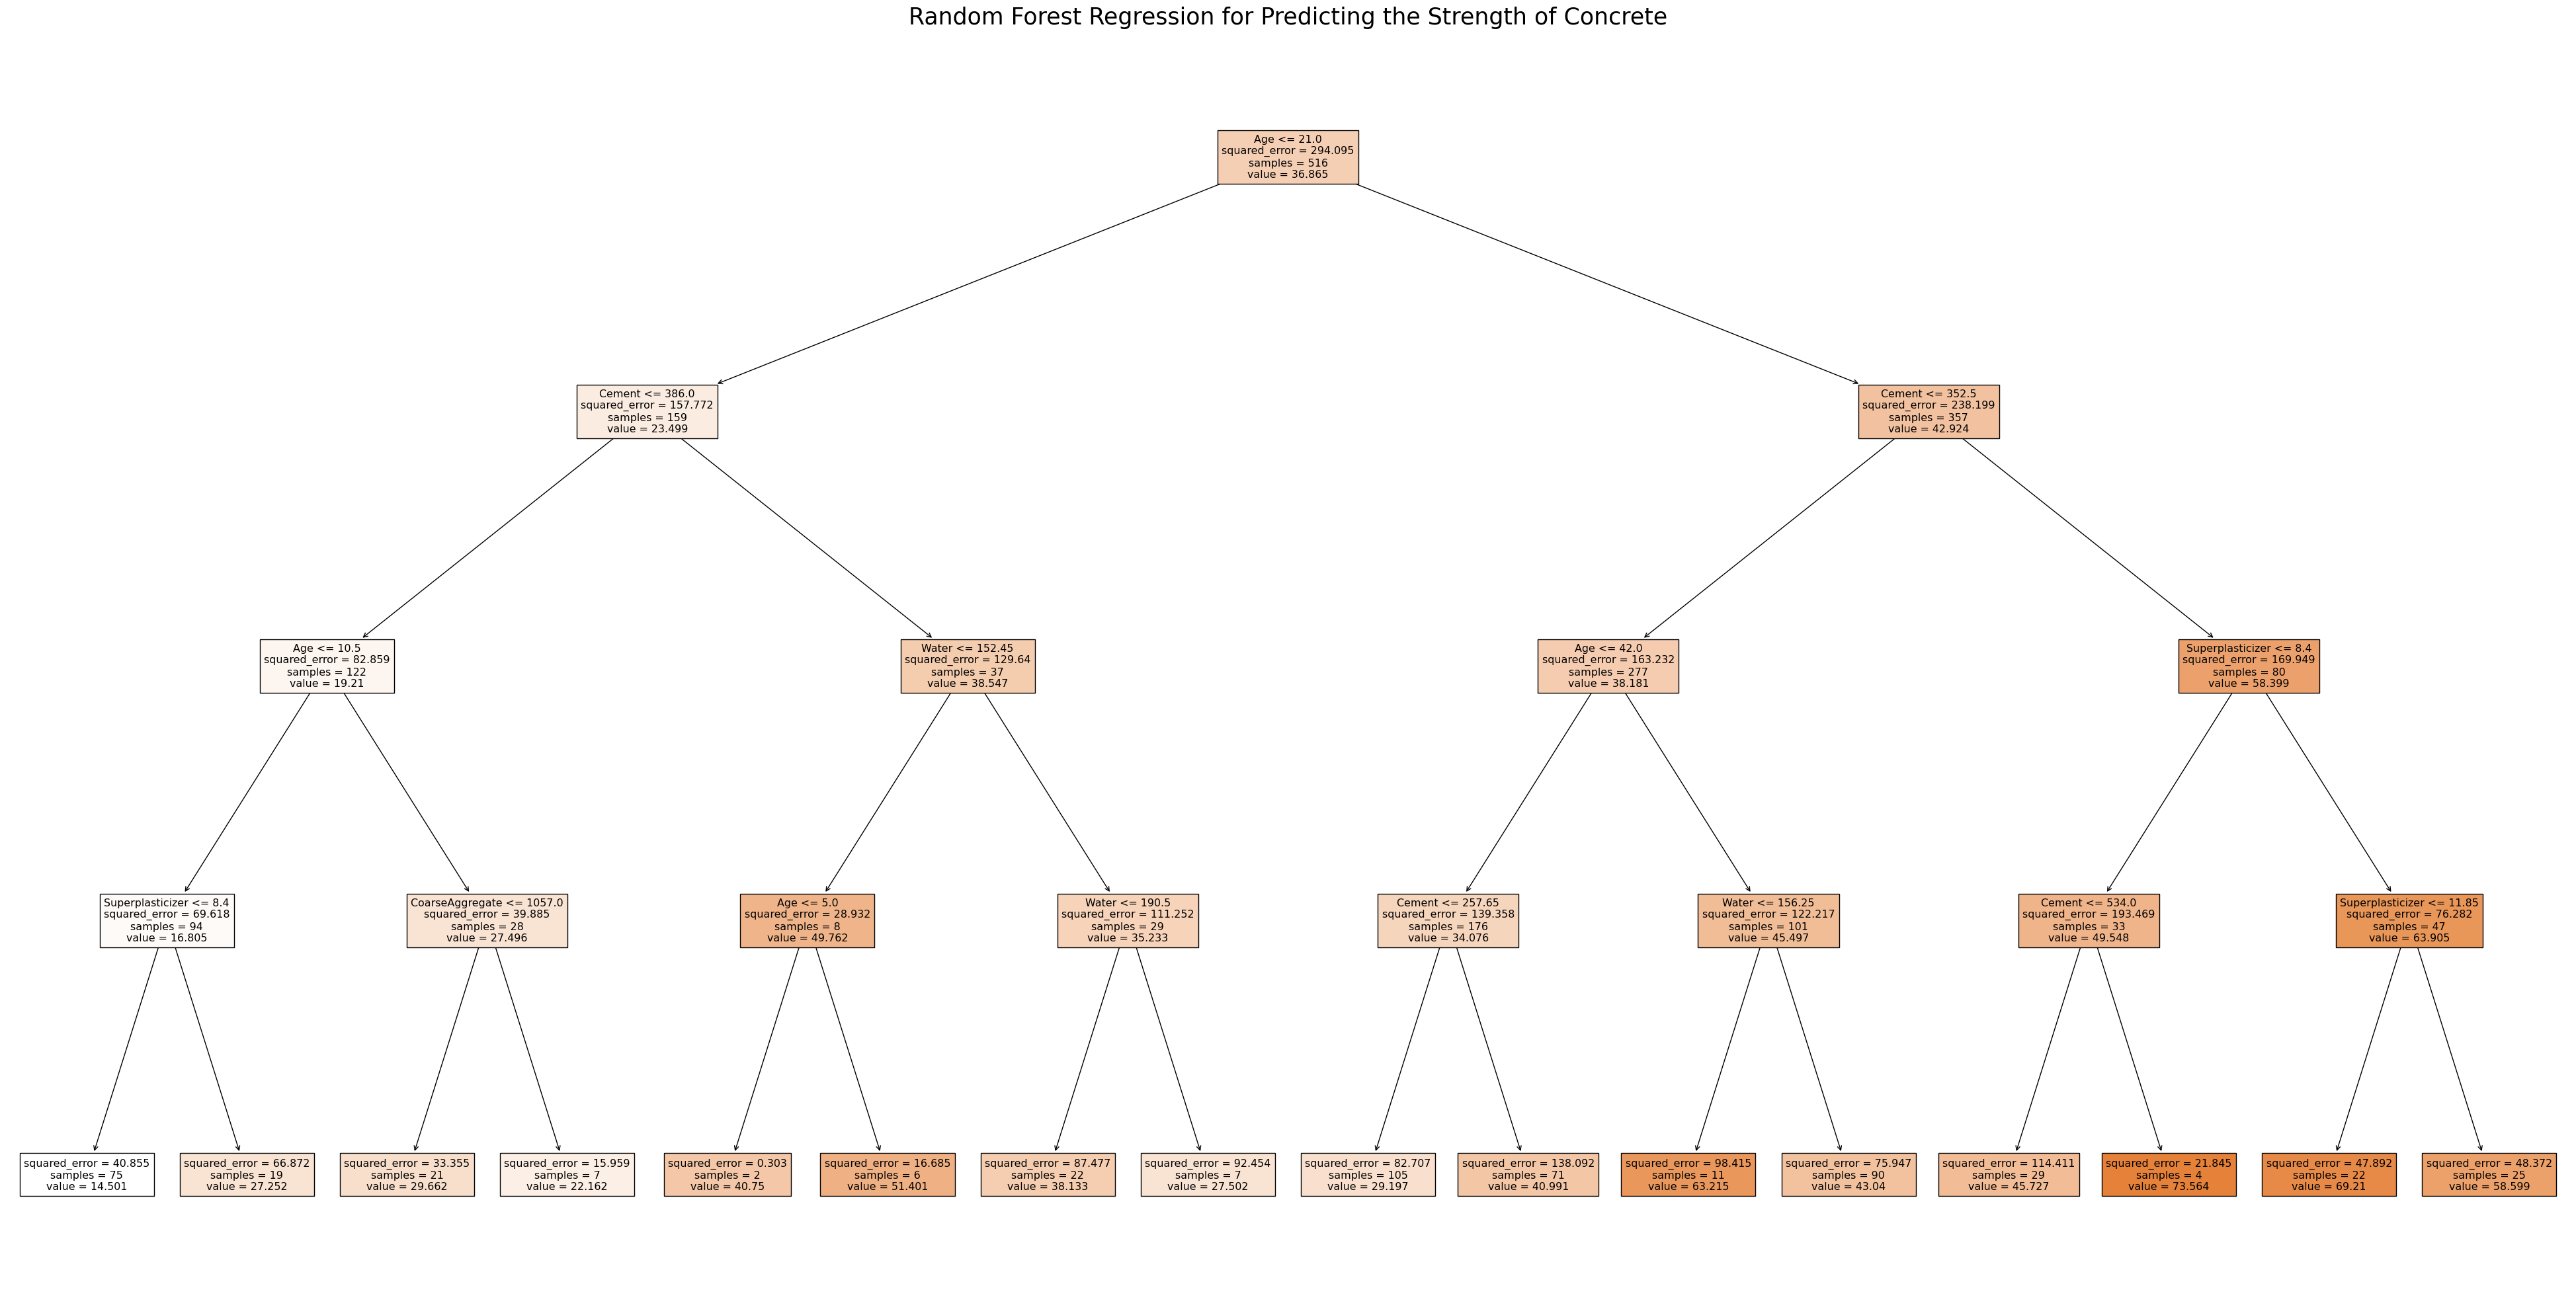

In [30]:
plt.rcParams['figure.figsize'] = [50, 25]

fig, ax = plt.subplots()

forest_plot = plot_tree(rand_search_f.best_estimator_[0], 
                      feature_names = X_trainval.columns,  
                       ax=ax, filled=True)

plt.title("Random Forest Regression for Predicting the Strength of Concrete", fontsize = 25)
plt.show();

In [31]:
rand_search_f.best_estimator_.feature_names_in_

array(['Cement', 'BlastFurnace', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age'], dtype=object)

In [32]:
rand_search_f.best_estimator_.feature_importances_

array([0.2872193 , 0.02631428, 0.01748091, 0.15020534, 0.06421656,
       0.00663017, 0.0201517 , 0.42778174])

In this model, the important features that contribute the most to the model are `Cement` and `Age`.

## Conclusion

- Pick the best performing model.
- Provide detailed explanation on why you picked this model as the final model here and talk about the feature importance.

I choose the random forest tree regressor because it reduces the mse in both train and test data.

## References
- https://www.kaggle.com/datasets/mchilamwar/predict-concrete-strength
- https://github.com/MAT388E-Spring23/Lecture_Materials/tree/main Gül İnan Lecture Slides. 